<a href="https://colab.research.google.com/github/Super-rookie-Py/_MachineLearning_Class/blob/main/%EB%B0%95%EA%B1%B4%EC%9A%B0__9_%EC%95%99%EC%83%81%EB%B8%94(Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [32]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [5]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [6]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [7]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.002589845657348633(+/-0.0027635156459283067
avg score time: 0.002420186996459961(+/-0.000891909775090515
avg test score: 0.96(+/-0.024944382578492935


In [8]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.021692276000976562(+/-0.004086477002537287
avg score time: 0.008246564865112304(+/-0.001073842580097868
avg test score: 0.96(+/-0.024944382578492935


##### 와인 데이터

In [9]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [10]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.001999378204345703(+/-0.0016883627124176794
avg score time: 0.002743434906005859(+/-0.0007041938901589078
avg test score: 0.9493650793650794(+/-0.037910929811115976


In [11]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.02214202880859375(+/-0.002868136398543481
avg score time: 0.008783674240112305(+/-0.000656933944371992
avg test score: 0.9606349206349206(+/-0.013879588722983607


##### 유방암 데이터

In [12]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [13]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.002399110794067383(+/-0.0007024036579962003
avg score time: 0.008045387268066407(+/-0.0011123133629542673
avg test score: 0.9648501785437045(+/-0.009609970350036127


In [14]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.025846290588378906(+/-0.006301917468263707
avg score time: 0.016468620300292967(+/-0.001086103108542607
avg test score: 0.9631113181183046(+/-0.015059565251444747


#### SVC

##### 붓꽃 데이터

In [15]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [16]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.0030473709106445313(+/-0.00228094613575342
avg score time: 0.0007096767425537109(+/-0.00027905089834513275
avg test score: 0.9666666666666666(+/-0.02108185106778919


In [17]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.028095436096191407(+/-0.0019634878402903606
avg score time: 0.0032817363739013673(+/-0.00031664861841586365
avg test score: 0.9466666666666667(+/-0.026666666666666658


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [18]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.003827190399169922(+/-0.0014934985156014068
avg score time: 0.0011296272277832031(+/-0.0005138181582402962
avg test score: 0.9833333333333334(+/-0.022222222222222233


In [19]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.03144545555114746(+/-0.00584199387375533
avg score time: 0.003244495391845703(+/-0.00020228186498425687
avg test score: 0.9722222222222221(+/-0.024845199749997673


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [21]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.006492042541503906(+/-0.0014200859410467015
avg score time: 0.0013946533203125(+/-5.596869923686672e-05
avg test score: 0.9736376339077782(+/-0.014678541667933545


In [22]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.04018664360046387(+/-0.003212932604076651
avg score time: 0.007481813430786133(+/-0.0008813597656305409
avg test score: 0.9596025461884802(+/-0.02042771644505906


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.0020284652709960938(+/-0.001876205707474921
avg score time: 0.0011368274688720703(+/-0.0015082600926608603
avg test score: 0.9666666666666668(+/-0.036514837167011066


In [25]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.027394533157348633(+/-0.00424210078614978
avg score time: 0.0024748802185058593(+/-0.00031851025353424686
avg test score: 0.9399999999999998(+/-0.04898979485566355


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.0028496265411376955(+/-0.001498322521469346
avg score time: 0.00048818588256835935(+/-7.498991662607163e-05
avg test score: 0.8709523809523809(+/-0.051305948266633


In [28]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.028730010986328124(+/-0.004677882756092178
avg score time: 0.002327585220336914(+/-5.715815808258827e-05
avg test score: 0.9552380952380952(+/-0.02198627575310471


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.009560441970825196(+/-0.000867051462565362
avg score time: 0.0008622646331787109(+/-7.367289951984385e-05
avg test score: 0.9191119391398852(+/-0.021983692476986963


In [31]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.0388638973236084(+/-0.0017955601948932288
avg score time: 0.0029836177825927736(+/-0.0003090336483951083
avg test score: 0.9543393882937432(+/-0.016956732414636803


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [33]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [40]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [41]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.0018760204315185548(+/-0.0007726470234447896
avg score time: 0.0023263931274414063(+/-0.0011954139758508409
avg test score: 0.47357748833823543(+/-0.13243123464477455


In [42]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.019999885559082033(+/-0.0021171325744476334
avg score time: 0.010110712051391602(+/-0.0007008275683077415
avg test score: 0.509594959052966(+/-0.16680970728366326


##### 당뇨병 데이터

In [43]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [44]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.0023795127868652343(+/-0.0012208155360468862
avg score time: 0.002411365509033203(+/-0.0007943936897965046
avg test score: 0.3689720650295623(+/-0.044659049060165365


In [45]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.020450115203857422(+/-0.0019641403660967437
avg score time: 0.009752988815307617(+/-0.000771177651548512
avg test score: 0.3984657245751852(+/-0.06080489063021387


#### SVR

##### 보스턴 주택 가격 데이터

In [46]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [47]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.01667780876159668(+/-0.002069794779294763
avg score time: 0.0023581981658935547(+/-2.2762170244343857e-05
avg test score: 0.17631266230186618(+/-0.5224914915128981


In [48]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.05545477867126465(+/-0.003587809454024532
avg score time: 0.011215734481811523(+/-0.00245039031647569
avg test score: 0.20181345021238548(+/-0.25108530403977997


##### 당뇨병 데이터

In [49]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [50]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.011349248886108398(+/-0.0012468435301830774
avg score time: 0.002256345748901367(+/-0.0005790733969053872
avg test score: 0.14659936199629434(+/-0.02190798003342928


In [51]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.049361371994018556(+/-0.00815199984056713
avg score time: 0.008585834503173828(+/-0.000857174160350987
avg test score: 0.0630396070100981(+/-0.0206144827504755


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [52]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [53]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.005372333526611328(+/-0.001748951272225164
avg score time: 0.001283407211303711(+/-0.0006384457276297297
avg test score: 0.12000171959729249(+/-0.7961214401833929


In [54]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.03249797821044922(+/-0.0035026268919226113
avg score time: 0.0036362171173095702(+/-0.0010393109009132096
avg test score: 0.5533077363790027(+/-0.2374289857205324


##### 당뇨병 데이터

In [55]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [56]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.005577945709228515(+/-0.002611578490055636
avg score time: 0.0010373115539550782(+/-0.00016420110312166913
avg test score: -0.15188740697053715(+/-0.12329065344140788


In [57]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.0339292049407959(+/-0.004752632814052091
avg score time: 0.002744245529174805(+/-0.0003428386679507775
avg test score: 0.3372025256752419(+/-0.11756073302096569


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [58]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [59]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [62]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.13676557540893555(+/-0.009377045039176723
avg score time: 0.008524036407470703(+/-0.0005804676550812469
avg test score: 0.9666666666666668(+/-0.02108185106778919


In [63]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.1402204990386963(+/-0.004095030976121198
avg score time: 0.008466672897338868(+/-0.00044320569468864435
avg test score: 0.9720634920634922(+/-0.017571077268107502


In [64]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.21514129638671875(+/-0.007455235406592001
avg score time: 0.010389041900634766(+/-0.0018872834284197502
avg test score: 0.9648657040832169(+/-0.01919729036954872


### Random Forests 회귀

In [65]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [66]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.34041876792907716(+/-0.00798768996309952
avg score time: 0.008685588836669922(+/-0.0011569381963328264
avg test score: 0.6017265460206206(+/-0.25194731891947364


In [67]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.275559139251709(+/-0.011057862197491075
avg score time: 0.008248472213745117(+/-0.0008909184247115323
avg test score: 0.4215258046248679(+/-0.04216340694370522


### Extremely Randomized Trees 분류

In [68]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [69]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.09675617218017578(+/-0.00428932385042914
avg score time: 0.009312582015991212(+/-0.0009856212110286088
avg test score: 0.9533333333333334(+/-0.03399346342395189


In [70]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.10293941497802735(+/-0.002992635324849055
avg score time: 0.009619903564453126(+/-0.0014590282534923263
avg test score: 0.9833333333333332(+/-0.022222222222222233


In [71]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.12293767929077148(+/-0.007151923106999315
avg score time: 0.010466289520263673(+/-0.0001595608142472625
avg test score: 0.9648657040832169(+/-0.01566592330434181


### Extremely Randomized Trees 회귀

In [72]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [73]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.20785021781921387(+/-0.006158320701555548
avg score time: 0.00925450325012207(+/-0.0011372433207791656
avg test score: 0.6157937060315337(+/-0.25103571523911417


In [74]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.16650261878967285(+/-0.0055370119403576135
avg score time: 0.00864410400390625(+/-0.000419186919286401
avg test score: 0.439239738725896(+/-0.03754944018400179


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [76]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [77]:
n_calsses = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [90]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

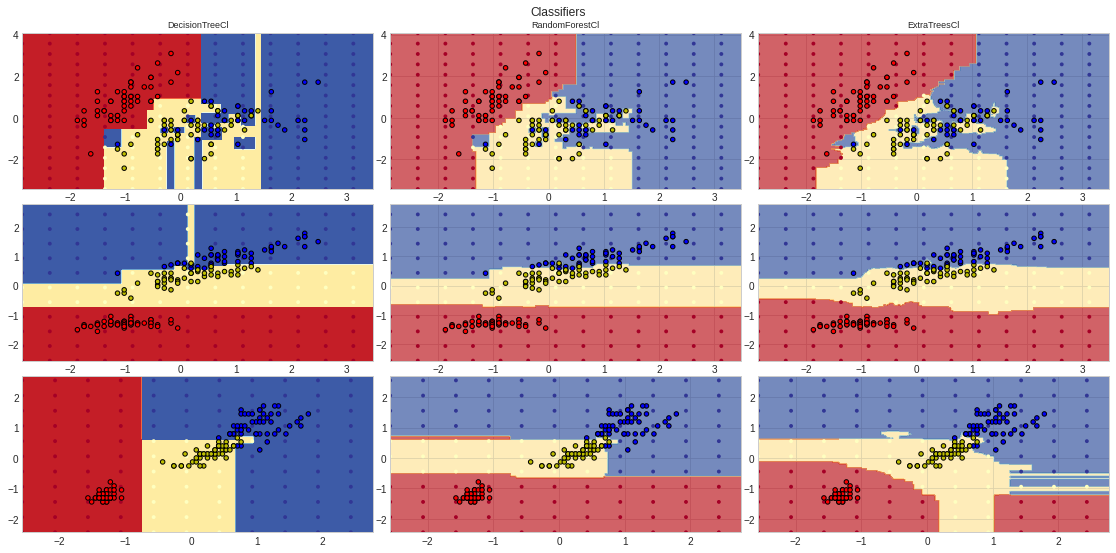

In [91]:
plt.figure(figsize=(16,8))

for pair in ([0, 1], [0, 2], [2, 3]):

  for model in models:
    
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - mean) / std

    model.fit(X, y)

    model_title = str(type(model)).split(".")[-1][:-len("Classifier")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min()-1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap = cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha = estimator_alpha,cmap = cmap)
    xx_coarser , yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                          np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)

    cs_points = plt.scatter(xx_coarser, yy_coarser, s= 15,
                            c= Z_points_coarser, cmap=cmap,
                            edgecolor="none")
    
    plt.scatter(X[:, 0], X[:, 1], c = y,
                cmap = ListedColormap(["r", 'y', 'b']),
                edgecolor='k', s= 20)
    plot_idx += 1

plt.suptitle("Classifiers", fontsize= 12)
plt.axis("tight")
plt.tight_layout(h_pad = 0.2, w_pad = 0.2 , pad = 2.5)
plt.show()

In [92]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

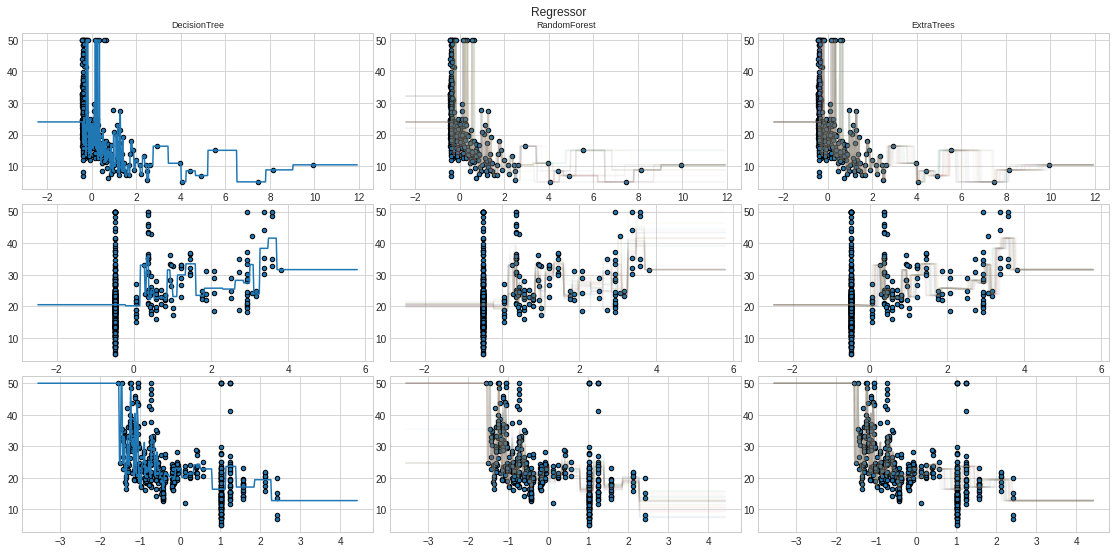

In [93]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):

  for model in models:

    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]

    plt.subplot(3, 3, plot_idx)

    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max + 1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1, 1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx, Z, alpha = estimator_alpha)

    plt.scatter(X, y , edgecolors="k", s=20)
    plot_idx += 1

plt.suptitle("Regressor", fontsize = 12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad = 0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [94]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [96]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [97]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.07432661056518555(+/-0.006187201288778941
avg score time: 0.00710000991821289(+/-0.0006342203916106297
avg test score: 0.9466666666666667(+/-0.03399346342395189


In [98]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.08379874229431153(+/-0.004467510051203342
avg score time: 0.0069618701934814455(+/-0.0003783184784033992
avg test score: 0.8085714285714285(+/-0.16822356718459935


In [99]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.16648125648498535(+/-0.011123972312161366
avg score time: 0.008057355880737305(+/-0.0007727228024174604
avg test score: 0.9701133364384411(+/-0.019709915473893072


### AdaBoost 회귀

In [100]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [101]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.10011053085327148(+/-0.011142989603402475
avg score time: 0.0043658256530761715(+/-0.0006284780060587568
avg test score: 0.5985744583807469(+/-0.20937548598257683


In [102]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.09193377494812012(+/-0.017928385724650036
avg score time: 0.0041866302490234375(+/-0.0008263325178015321
avg test score: 0.41312084500745616(+/-0.04091835944493939


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [104]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [105]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.1958972454071045(+/-0.014308468580165547
avg score time: 0.0010456562042236329(+/-9.34209547073083e-05
avg test score: 0.96(+/-0.024944382578492935


In [106]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y=wine.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.25044965744018555(+/-0.010599769639138194
avg score time: 0.001102113723754883(+/-0.0001314414924853231
avg test score: 0.9330158730158731(+/-0.04127777701479872


In [107]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.4424427032470703(+/-0.011120786400252446
avg score time: 0.0010138511657714843(+/-9.796080652231348e-05
avg test score: 0.9596180717279925(+/-0.02453263202329889


### Gradient Tree Boosting 회귀

In [108]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [109]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.12875833511352539(+/-0.0018470349311109084
avg score time: 0.0012058734893798829(+/-0.00017207066433702934
avg test score: 0.6752372690883461(+/-0.16121836382662494


In [110]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.10414915084838867(+/-0.005483718797501191
avg score time: 0.001049375534057617(+/-8.141966201152268e-05
avg test score: 0.4029450867301339(+/-0.0688801507855847


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [111]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [112]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [("svc", model1), ("naive", model2), ("forest",model3)],
    voting = "hard"
)

In [114]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv = 5)
  print("Accurarcy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))


Accurarcy: 0.97 (+/- 0.02) [SVC]
Accurarcy: 0.95 (+/- 0.03) [GaussianNB]
Accurarcy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accurarcy: 0.97 (+/- 0.02) [VotingClassifier]


In [115]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(
    estimators = [("svc", model1), ("naive", model2), ("forest",model3)],
    voting = "soft",
    weights = [2, 1, 2]
)

In [116]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv = 5)
  print("Accurarcy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accurarcy: 0.97 (+/- 0.02) [SVC]
Accurarcy: 0.95 (+/- 0.03) [GaussianNB]
Accurarcy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accurarcy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [118]:
X = iris.data[:, [0, 2]]
y = iris.target

In [120]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf',probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ("svc", model3)],
                              voting = 'soft', weights=[2, 1, 2])
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [121]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


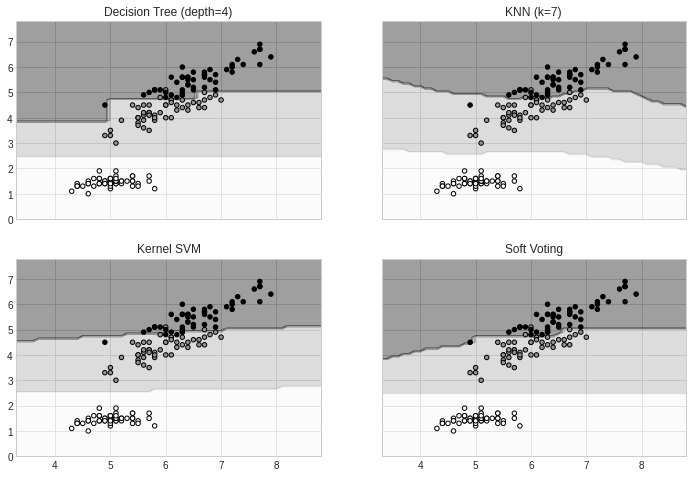

In [123]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ["Decision Tree (depth=4)", "KNN (k=7)",
                           "Kernel SVM", "Soft Voting"]):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [125]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [("linear", model1), ("gbr", model2), ("rfr", model3)],
    weights = [1, 1, 1]
)

In [127]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:2]
  scores = cross_val_score(model, boston.data, boston.target, cv = 5)
  print("R2: %0.2f (+/- %0.2f)[%s]"% (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38)[Li]
R2: 0.68 (+/- 0.16)[Gr]
R2: 0.63 (+/- 0.21)[Ra]
R2: 0.66 (+/- 0.20)[Vo]


### 회귀식 시각화

In [128]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [129]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [("linear", model1), ("gbr", model2), ("rfr", model3)],
    weights = [1, 1, 1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [130]:
x_min, x_max = X.min()-1 , X.max()+1
xx = np.arange(x_min-1, x_max + 1, 0.1)

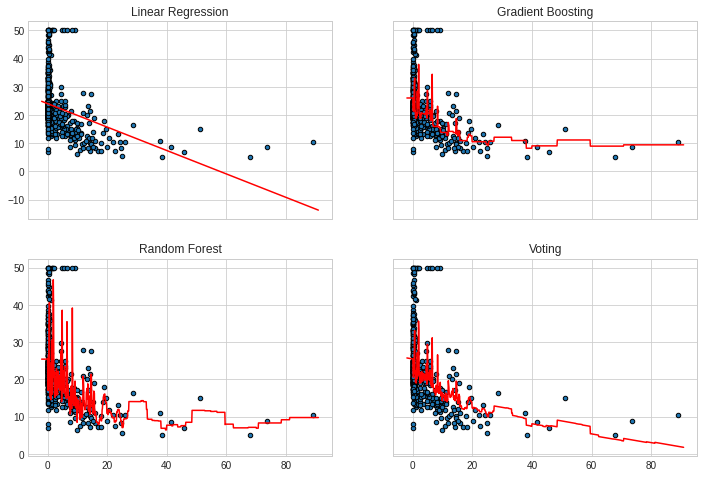

In [131]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey = 'row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ["Linear Regression", "Gradient Boosting", "Random Forest", "Voting"]):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [132]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [133]:
estimator = [("ridge",Ridge()),
             ("lasso", Lasso()),
             ('svr', SVR())]

In [134]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimator,
        final_estimator = GradientBoostingRegressor()
    )
)

In [135]:
cross_val = cross_validate(
    estimator = reg,
    X = boston.data, y=boston.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.15206217765808105(+/-0.0034929142672166847
avg score time: 0.0031223297119140625(+/-0.0001551900211431156
avg test score: 0.31577910112762775(+/-0.3363039162410791


#### 회귀식 시각화

In [136]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [137]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
    estimators=estimator,
    final_estimator = GradientBoostingRegressor()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

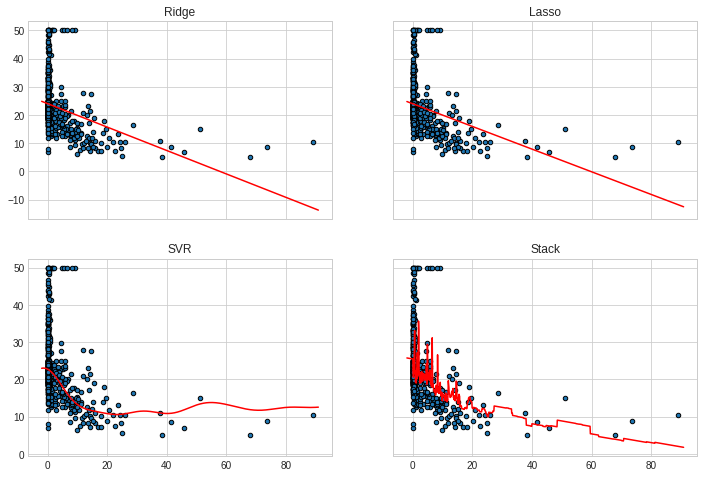

In [139]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey = 'row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ["Ridge", "Lasso", "SVR", "Stack"]):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [141]:
estimators = [("logistic", LogisticRegression(max_iter=10000)),
              ("svc", SVC()),
              ('naive', GaussianNB())]

In [142]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

In [143]:
cross_val = cross_validate(
    estimator = clf,
    X = iris.data, y=iris.target,
    cv=5
)
print("avg fit time: {}(+/-{}".format(cross_val['fit_time'].mean(), cross_val["fit_time"].std()))
print("avg score time: {}(+/-{}".format(cross_val['score_time'].mean(), cross_val["score_time"].std()))
print("avg test score: {}(+/-{}".format(cross_val['test_score'].mean(), cross_val["test_score"].std()))


avg fit time: 0.3033568859100342(+/-0.010709785662453782
avg score time: 0.00943455696105957(+/-0.0006289055985539832
avg test score: 0.96(+/-0.024944382578492935


#### 결정 경계 시각화

In [144]:
X = iris.data[:, [0, 2]]
y = iris.target

In [148]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [149]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


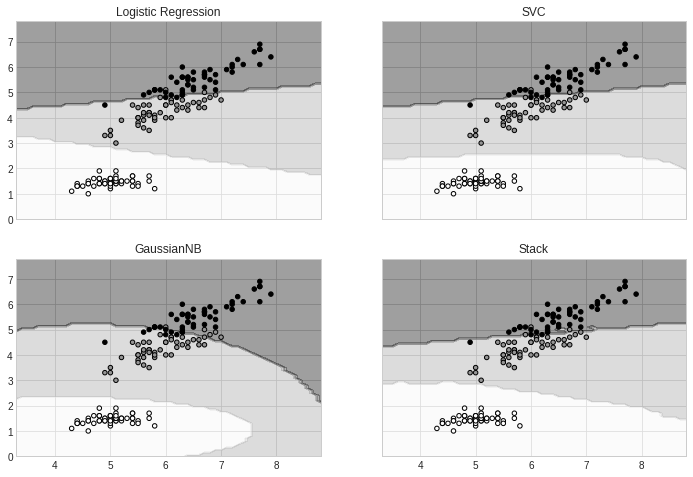

In [150]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack],
                          ["Logistic Regression", "SVC",
                           "GaussianNB", "Stack"]):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()